<a href="https://colab.research.google.com/github/SBShimm/Aiffel/blob/master/exploration/Exploration15_SB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 다양한 OCR모델 비교하기

OCR 모델에 적용할 이미지로는 컨테이너와 번호판을 사용하도록 하겠습니다.  
컨테이너에는 컨테이너 번호를 포함한 컨테이너의 몇가지 정보들이 입력되어 있습니다. 해당 정보들을 제대로 인식할 수 있다면 컨테이너 터미널 운영에 도움되는 프로그램을 만들 수 있을 것입니다.  
차량의 번호판에도 몇가지 정보가 있겠지만 현재 주차장에서 사용되는 기술로 번호판을 인식하여 주차요금을 정산하는 시스템이 있습니다. 번호판을 성공적으로 인식하여 차량 번호를 알아볼 수 있는지 보겠습니다.

## 1. keras ocr  
먼저 keras 모델을 사용해 보겠습니다. 필요한 패키지들을 설치해줍시다.

In [ ]:
#! pip install keras-ocr

In [ ]:
#pip install protobuf==3.19.4

In [ ]:
#pip install opencv-contrib-python==4.5.3.56

In [1]:
! pip list | grep opencv

opencv-contrib-python         4.5.3.56
opencv-python                 4.6.0.66
opencv-python-headless        4.6.0.66


In [6]:
import matplotlib.pyplot as plt
import keras_ocr

# keras-ocr이 detector과 recognizer를 위한 모델을 자동으로 다운로드받게 됩니다. 
pipeline = keras_ocr.pipeline.Pipeline()

Looking for /root/.keras-ocr/craft_mlt_25k.h5
Looking for /root/.keras-ocr/crnn_kurapan.h5


각각 컨테이너 사진 10개, 번호판 사진 10개를 https://unsplash.com/ 에서 가져왔습니다.

In [7]:
dir_path = '/content/drive/MyDrive/Colab/Datasets/ocr_image'
file_lists = ['c1.jpg', 'c2.jpg', 'c3.jpg', 'c4.jpg', 'c5.jpg', 'c6.jpg', 'c7.jpg', 'c8.jpg', 'c9.jpg', 'c10.jpg',
              'b1.jpg', 'b2.jpg', 'b3.jpg', 'b4.jpg', 'b5.jpg', 'b6.jpg', 'b7.jpg', 'b8.jpg', 'b9.jpg', 'b10.jpg']

# 테스트에 사용할 이미지 url을 모아 봅니다. 추가로 더 모아볼 수도 있습니다. 
image_urls = []
for file in file_lists:
    image_file = dir_path + '/' + file
    image_urls.append(image_file)

print('file_dirs: ', image_urls)

images = [ keras_ocr.tools.read(url) for url in image_urls]
prediction_groups = [pipeline.recognize([url]) for url in image_urls]

file_dirs:  ['/content/drive/MyDrive/Colab/Datasets/ocr_image/c1.jpg', '/content/drive/MyDrive/Colab/Datasets/ocr_image/c2.jpg', '/content/drive/MyDrive/Colab/Datasets/ocr_image/c3.jpg', '/content/drive/MyDrive/Colab/Datasets/ocr_image/c4.jpg', '/content/drive/MyDrive/Colab/Datasets/ocr_image/c5.jpg', '/content/drive/MyDrive/Colab/Datasets/ocr_image/c6.jpg', '/content/drive/MyDrive/Colab/Datasets/ocr_image/c7.jpg', '/content/drive/MyDrive/Colab/Datasets/ocr_image/c8.jpg', '/content/drive/MyDrive/Colab/Datasets/ocr_image/c9.jpg', '/content/drive/MyDrive/Colab/Datasets/ocr_image/c10.jpg', '/content/drive/MyDrive/Colab/Datasets/ocr_image/b1.jpg', '/content/drive/MyDrive/Colab/Datasets/ocr_image/b2.jpg', '/content/drive/MyDrive/Colab/Datasets/ocr_image/b3.jpg', '/content/drive/MyDrive/Colab/Datasets/ocr_image/b4.jpg', '/content/drive/MyDrive/Colab/Datasets/ocr_image/b5.jpg', '/content/drive/MyDrive/Colab/Datasets/ocr_image/b6.jpg', '/content/drive/MyDrive/Colab/Datasets/ocr_image/b7.jpg', 

18분이나 걸립니다.. 오래걸리네요.  
결과를 확인해 보겠습니다.

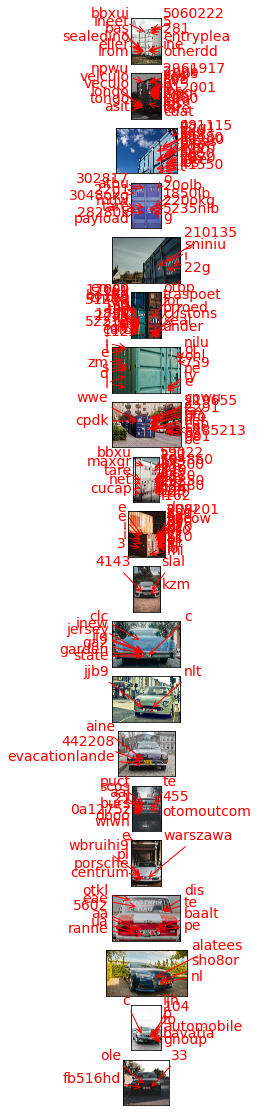

In [8]:
# Plot the predictions
fig, axs = plt.subplots(nrows=len(images), figsize=(20, 20))
for idx, ax in enumerate(axs):
    keras_ocr.tools.drawAnnotations(image=images[idx], 
                                    predictions=prediction_groups[idx][0], ax=ax)

성공적으로 인식을 완료하였습니다. 하나씩 확인해 보겠습니다.

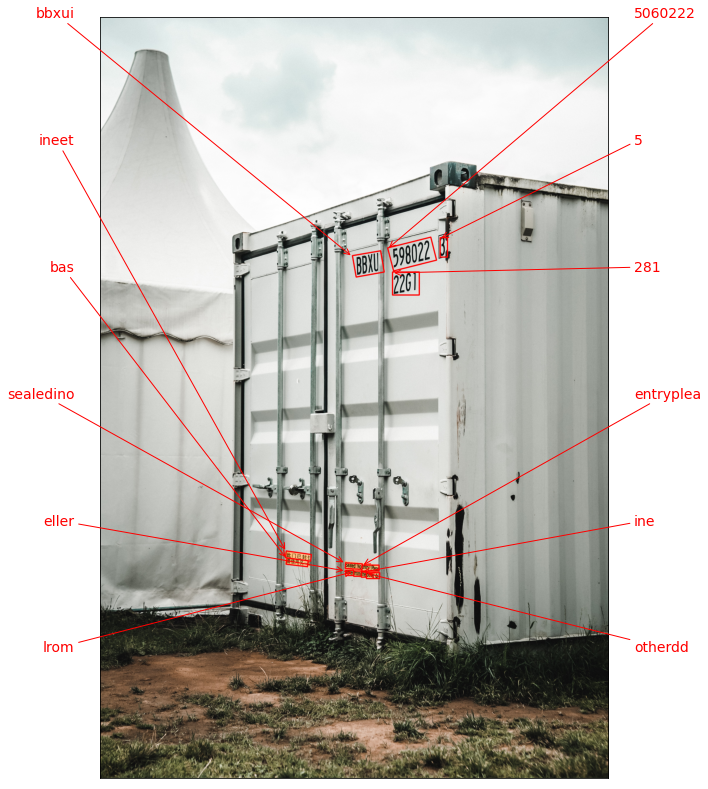

In [10]:
idx = 0
plt.rcParams["figure.figsize"] = (14,14)
keras_ocr.tools.drawAnnotations(image=images[idx], 
                                predictions=prediction_groups[idx][0])

제일 중요한 정보인 컨테이너 번호는 BBXU 5980223이고 컨테이너 타입은 22G1 인데 제대로 뽑아내지 못했습니다. 컨테이너가 측면으로 촬영되어 BBXU부분과 3 부분의 인식이 제대로 되지 않은것 같습니다.

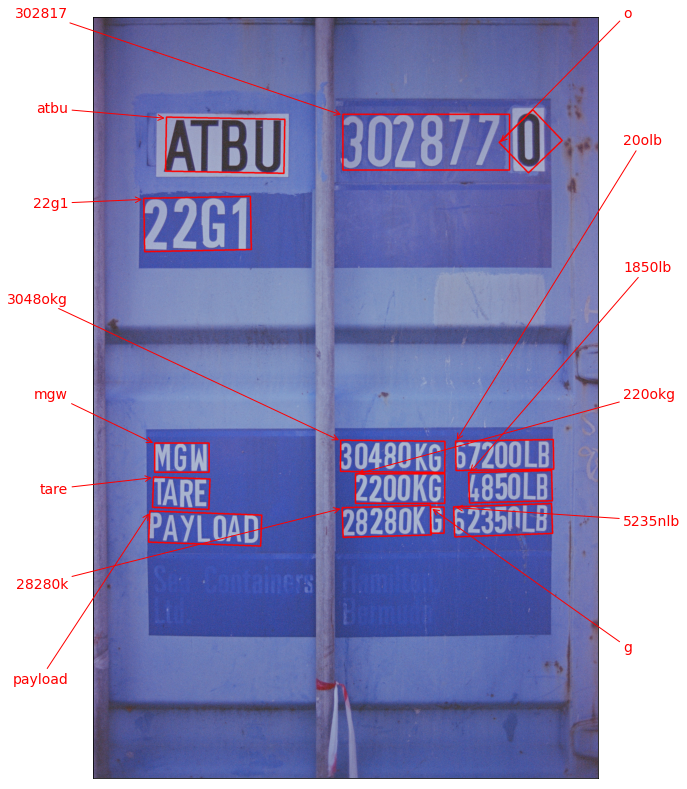

In [11]:
idx = 3
plt.rcParams["figure.figsize"] = (14,14)
keras_ocr.tools.drawAnnotations(image=images[idx], 
                                predictions=prediction_groups[idx][0])

정면으로 찍힌 컨테이너의 경우에는 숫자 하나를 제외하곤 제대로 뽑아낸 것으로 보입니다.

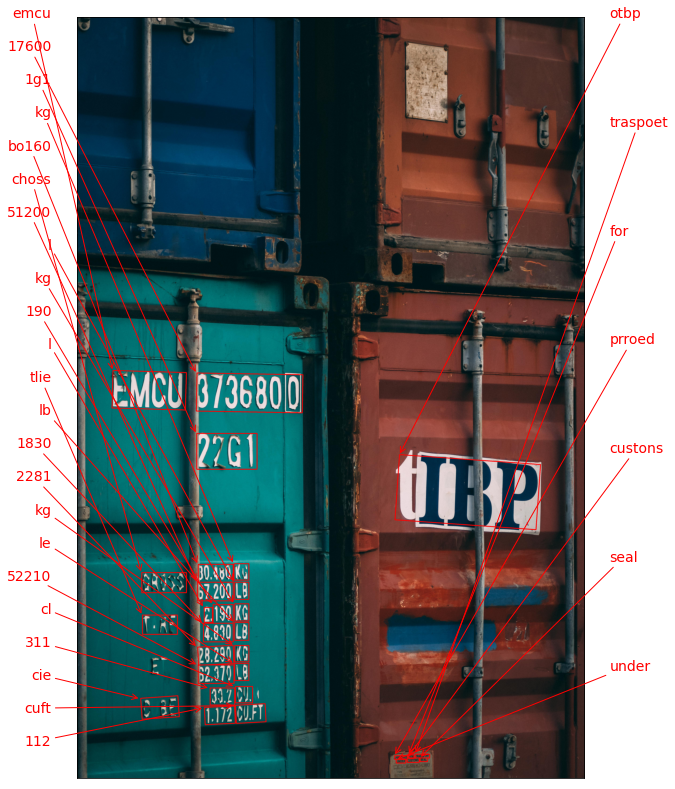

In [12]:
idx = 5
plt.rcParams["figure.figsize"] = (14,14)
keras_ocr.tools.drawAnnotations(image=images[idx], 
                                predictions=prediction_groups[idx][0])

번호가 벗겨진 노후된 컨테이너 또한 인식을 제대로 하지 못합니다.

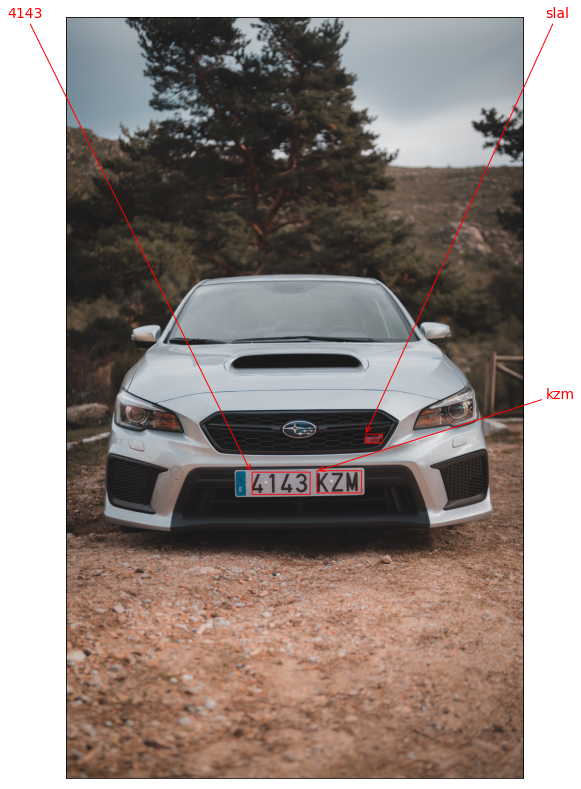

In [13]:
idx = 10
plt.rcParams["figure.figsize"] = (14,14)
keras_ocr.tools.drawAnnotations(image=images[idx], 
                                predictions=prediction_groups[idx][0])

차량 번호판의 경우에는 인식을 제대로 하는 것으로 보입니다.

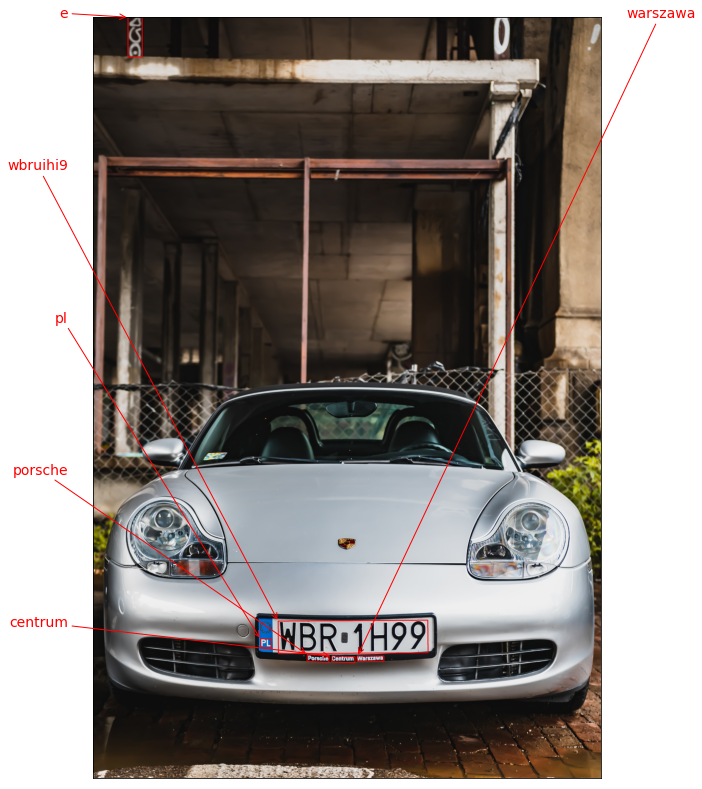

In [14]:
idx = 15
plt.rcParams["figure.figsize"] = (14,14)
keras_ocr.tools.drawAnnotations(image=images[idx], 
                                predictions=prediction_groups[idx][0])

해당 사진의 경우에는 WBR 사이에 있는 홈 부분을 문자로 인식하고 숫자도 제대로 구분하지 못하였습니다.

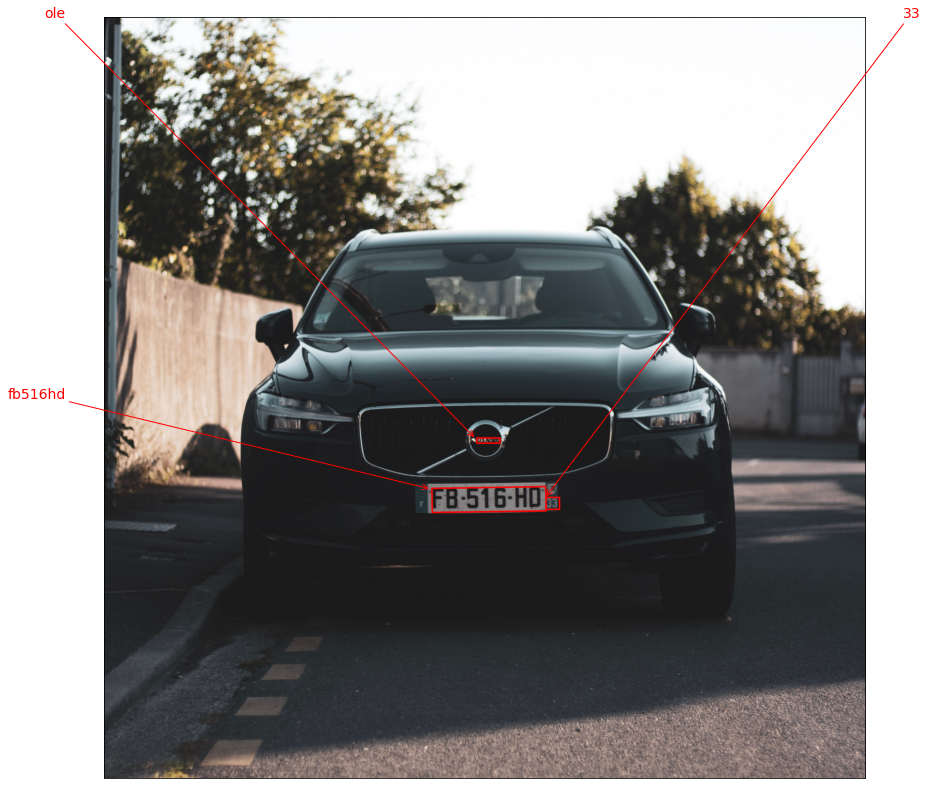

In [16]:
idx = 19
plt.rcParams["figure.figsize"] = (14,14)
keras_ocr.tools.drawAnnotations(image=images[idx], 
                                predictions=prediction_groups[idx][0])

위의 사진과 같이 번호 사이에 점같은 것이 있지만 해당 사진은 제대로 인식을 하였습니다. 명암이 뚜렷한 경우에 더 인식을 잘하는 것 같기도 합니다.

## 2. 테서랙트 ocr

In [ ]:
# ! sudo apt install tesseract-ocr
# ! sudo apt install libtesseract-dev

In [ ]:
# pip install pytesseract

In [18]:
import os
import pytesseract
from PIL import Image
from pytesseract import Output
import matplotlib.pyplot as plt

# OCR Engine modes(–oem):
# 0 - Legacy engine only.
# 1 - Neural nets LSTM engine only.
# 2 - Legacy + LSTM engines.
# 3 - Default, based on what is available.

# Page segmentation modes(–psm):
# 0 - Orientation and script detection (OSD) only.
# 1 - Automatic page segmentation with OSD.
# 2 - Automatic page segmentation, but no OSD, or OCR.
# 3 - Fully automatic page segmentation, but no OSD. (Default)
# 4 - Assume a single column of text of variable sizes.
# 5 - Assume a single uniform block of vertically aligned text.
# 6 - Assume a single uniform block of text.
# 7 - Treat the image as a single text line.
# 8 - Treat the image as a single word.
# 9 - Treat the image as a single word in a circle.
# 10 - Treat the image as a single character.
# 11 - Sparse text. Find as much text as possible in no particular order.
# 12 - Sparse text with OSD.
# 13 - Raw line. Treat the image as a single text line, bypassing hacks that are Tesseract-specific.

def crop_word_regions(image_path='./images/sample.png', output_path='./output'):
    if not os.path.exists(output_path):
        os.mkdir(output_path)
    custom_oem_psm_config = r'--oem 3 --psm 3'
    image = Image.open(image_path)

    recognized_data = pytesseract.image_to_data(
        image, lang='eng',    # 한국어라면 lang='kor'
        config=custom_oem_psm_config,
        output_type=Output.DICT
    )
    
    top_level = max(recognized_data['level'])
    index = 0
    cropped_image_path_list = []
    for i in range(len(recognized_data['level'])):
        level = recognized_data['level'][i]
    
        if level == top_level:
            left = recognized_data['left'][i]
            top = recognized_data['top'][i]
            width = recognized_data['width'][i]
            height = recognized_data['height'][i]
            
            output_img_path = os.path.join(output_path, f"{str(index).zfill(4)}.png")
            print(output_img_path)
            cropped_image = image.crop((
                left,
                top,
                left+width,
                top+height
            ))
            cropped_image.save(output_img_path)
            cropped_image_path_list.append(output_img_path)
            index += 1
    return cropped_image_path_list

In [19]:
def recognize_images(cropped_image_path_list):
    custom_oem_psm_config = r'--oem 3 --psm 7'
    
    for image_path in cropped_image_path_list:
        image = Image.open(image_path)
        recognized_data = pytesseract.image_to_string(
            image, lang='eng',    # 한국어라면 lang='kor'
            config=custom_oem_psm_config,
            output_type=Output.DICT
        )
        print(recognized_data['text'])
    print("Done")

In [22]:
file_lists = ['c1.jpg', 'c3.jpg', 'c4.jpg', 'c5.jpg', 'c6.jpg', 'c7.jpg', 'c8.jpg', 'c9.jpg',
              'b1.jpg', 'b2.jpg', 'b3.jpg', 'b4.jpg', 'b5.jpg', 'b6.jpg', 'b7.jpg', 'b8.jpg', 'b9.jpg', 'b10.jpg']
for file in file_lists:
    image_file = dir_path + '/' + file
    print('file_name: ', file)

    # Tesseract OCR
    output_dir = dir_path + file
    cropped_image_path_list = crop_word_regions(image_file, output_dir)
    # 위에서 준비한 문자 영역 파일들을 인식하여 얻어진 텍스트를 출력
    tesseract_ocr = recognize_images(cropped_image_path_list)
    print('='*70)
    print()

file_name:  c1.jpg
/content/drive/MyDrive/Colab/Datasets/ocr_imagec1.jpg/0000.png
/content/drive/MyDrive/Colab/Datasets/ocr_imagec1.jpg/0001.png
/content/drive/MyDrive/Colab/Datasets/ocr_imagec1.jpg/0002.png
/content/drive/MyDrive/Colab/Datasets/ocr_imagec1.jpg/0003.png
/content/drive/MyDrive/Colab/Datasets/ocr_imagec1.jpg/0004.png
/content/drive/MyDrive/Colab/Datasets/ocr_imagec1.jpg/0005.png
/content/drive/MyDrive/Colab/Datasets/ocr_imagec1.jpg/0006.png
er

Ne os ik

am} | \ 3

—  ~


— |


Done

file_name:  c3.jpg
/content/drive/MyDrive/Colab/Datasets/ocr_imagec3.jpg/0000.png

Done

file_name:  c4.jpg
/content/drive/MyDrive/Colab/Datasets/ocr_imagec4.jpg/0000.png

Done

file_name:  c5.jpg
/content/drive/MyDrive/Colab/Datasets/ocr_imagec5.jpg/0000.png

Done

file_name:  c6.jpg
/content/drive/MyDrive/Colab/Datasets/ocr_imagec6.jpg/0000.png

Done

file_name:  c7.jpg
/content/drive/MyDrive/Colab/Datasets/ocr_imagec7.jpg/0000.png
/content/drive/MyDrive/Colab/Datasets/ocr_image

테서랙트의 결과이다.. 컨테이너 부분에선 영 구분을 하지 못하고 [SystemError: tile cannot extend outside image] 라는 에러가 뜨는데 크롭된 이미지의 사이즈가 0,0일 때 발생하는 에러라고 하여 몇가지 사진을 제외하였다.  
  
  
번호판도 성능이 영 좋지않다.  
  
대충 크롭된 영역들을 살펴보니 아예 번호판 부분을 뽑아내지 못하는 듯 했다.  
제일 큰 문제는 크롭되는 영역들의 순서가 번호판의 순서와 뒤죽박죽이라 제대로 구분을 한다고 해도 순서를 어떻게 조합해야 할 지 모르겠다.  
테서랙트는 숫자보다는 영어를 구분하는 데 더 좋은 성능을 보이는 듯 하다.

## 3. 결론  
내가 생각한 컨테이너에서 정보를 뽑는것과 번호판 인식의 경우에는 인식에 최적화된 부분을 keras ocr model을 통해 인식시키는 것이 좋은 결과를 얻을 수 있을것 같다.

## 4. 회고  
1. 처음 시작할 떄 굉장히 오래 걸릴것 같았는데 은근히 사용하기 편했던것 같다. 
2. 테서랙트가 결과가 너무 안좋은데 구글링으로 다른 이미지에 사용한 것을 봤더니 문자 인식에서는 좋은 성능을 보이는 것 같았다. 근데 저걸 인식해서 순서를 어떻게 맞출지가 상상이 안된다.